**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import scipy
from scipy.spatial.distance import cdist
from sklearn.neighbors import KDTree

%load_ext pycodestyle_magic

In [3]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.int8(y)
        self.classes = np.unique(self.y)
        if (self.algorithm == 'kd_tree'):
            self.tree = KDTree(X)

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

    def predict_proba(self, X):
        y_pred = np.zeros((X.shape[0], self.classes.shape[0]))
        if (self.algorithm == 'brute'):
            dist = cdist(X, self.X)
            nearest_args = np.argpartition(dist, self.n_neighbors)
            nearest_args = nearest_args[:, 0:self.n_neighbors]
        elif (self.algorithm == 'kd_tree'):
            d, nearest_args = self.tree.query(X, k=self.n_neighbors)

        for (i, args_i) in enumerate(nearest_args):
            for x in args_i:
                y_pred[i, self.y[x]] += 1.
            y_pred[i] = y_pred[i]/self.n_neighbors

        return y_pred

    def score(self, X, y):
        y_test = self.predict(X)
        return float((y_test == np.array(y)).sum()) / y.shape[0]

**IRIS**

In [290]:
iris = datasets.load_iris()

In [291]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [292]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [293]:
%time clf.fit(X_train, y_train)

CPU times: user 1.25 ms, sys: 0 ns, total: 1.25 ms
Wall time: 820 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [294]:
%time my_clf.fit(X_train, y_train)

CPU times: user 157 µs, sys: 10 µs, total: 167 µs
Wall time: 107 µs


In [295]:
%time clf.predict(X_test)

CPU times: user 1.04 ms, sys: 0 ns, total: 1.04 ms
Wall time: 741 µs


array([1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 1, 1])

In [296]:
%time my_clf.predict(X_test)

CPU times: user 538 µs, sys: 0 ns, total: 538 µs
Wall time: 302 µs


array([1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 1, 1])

In [297]:
%time clf.predict_proba(X_test)

CPU times: user 1.37 ms, sys: 0 ns, total: 1.37 ms
Wall time: 1.1 ms


array([[0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ]])

In [298]:
%time my_clf.predict_proba(X_test)

CPU times: user 892 µs, sys: 0 ns, total: 892 µs
Wall time: 475 µs


array([[0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ]])

In [299]:
clf.score(X_test, y_test)

0.9333333333333333

In [300]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

16


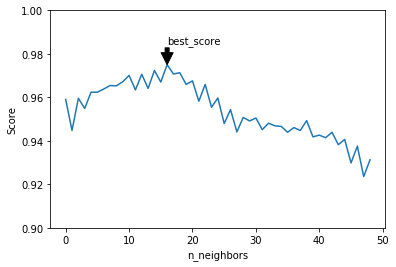

In [269]:
score_list = []
n_try = 500
for i in range(1, 50):
    score = 0.
    for j in range(1, n_try):
        (X_train, X_test,
         y_train, y_test) = train_test_split(iris.data,
                                             iris.target,
                                             test_size=0.1,
                                             stratify=iris.target)

        my_clf = MyKNeighborsClassifier(n_neighbors=i)
        my_clf.fit(X_train, y_train)
        score += my_clf.score(X_test, y_test)

    score_list.append(score/n_try)

best_n_neighbors = np.argmax(score_list)
best_score = np.max(score_list)
print(best_n_neighbors)

fig = plt.plot(score_list)
plt.ylim(0.9, 1.0)
plt.ylabel('Score')
plt.xlabel('n_neighbors')
plt.annotate('best_score', xy=(best_n_neighbors, best_score),
             xytext=(best_n_neighbors, best_score+0.01),
             arrowprops=dict(facecolor='black', shrink=0.9),
             )
plt.show()

**MNIST**

In [6]:
mnist = fetch_mldata('MNIST original')

/home/nikolai/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/nikolai/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [271]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [272]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [273]:
%time clf.fit(X_train, y_train)

CPU times: user 22.1 s, sys: 153 ms, total: 22.2 s
Wall time: 22.2 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [274]:
%time my_clf.fit(X_train, y_train)

CPU times: user 12.4 ms, sys: 22.1 ms, total: 34.5 ms
Wall time: 8.79 ms


In [275]:
%time clf.predict(X_test)

CPU times: user 1min 4s, sys: 0 ns, total: 1min 4s
Wall time: 1min 3s


array([2., 6., 5., 2., 4., 8., 6., 7., 6., 8., 8., 9., 3., 1., 0., 1., 6.,
       1., 3., 3., 6., 7., 5., 7., 1., 2., 4., 7., 7., 5., 2., 0., 1., 9.,
       9., 1., 1., 6., 4., 3., 0., 9., 0., 3., 1., 7., 4., 9., 1., 1., 3.,
       6., 1., 8., 8., 9., 3., 6., 5., 7., 6., 7., 8., 5., 8., 3., 7., 7.,
       5., 0., 7., 9., 0., 9., 7., 4., 5., 7., 9., 9., 4., 9., 6., 8., 6.,
       3., 9., 8., 3., 4., 4., 0., 2., 4., 1., 3., 3., 9., 9., 3., 5., 5.,
       7., 7., 3., 4., 9., 7., 5., 0., 3., 1., 3., 0., 5., 7., 7., 5., 8.,
       7., 9., 3., 8., 1., 5., 7., 3., 8., 5., 2., 2., 0., 0., 1., 3., 0.,
       1., 1., 3., 0., 3., 0., 6., 4., 7., 7., 0., 2., 9., 5., 4., 4., 8.,
       4., 3., 9., 6., 3., 2., 3., 7., 1., 1., 9., 8., 8., 4., 9., 3., 7.,
       3., 2., 2., 9., 2., 8., 0., 1., 0., 4., 9., 6., 2., 2., 4., 0., 1.,
       8., 8., 4., 2., 9., 1., 0., 6., 4., 7., 6., 5., 7., 2., 2., 3., 5.,
       8., 5., 6., 5., 5., 7., 4., 5., 3., 6., 2., 0., 5., 7., 1., 2., 6.,
       3., 5., 7., 5., 0.

In [276]:
%time my_clf.predict(X_test)

CPU times: user 26.2 s, sys: 307 ms, total: 26.5 s
Wall time: 26.6 s


array([2, 6, 5, 2, 4, 8, 6, 7, 6, 8, 8, 9, 3, 1, 0, 1, 6, 1, 3, 3, 6, 7,
       5, 7, 1, 2, 4, 7, 7, 5, 2, 0, 1, 9, 9, 1, 1, 6, 4, 3, 0, 9, 0, 3,
       1, 7, 4, 9, 1, 1, 3, 6, 1, 8, 8, 9, 3, 6, 5, 7, 6, 7, 8, 5, 8, 3,
       7, 7, 5, 0, 7, 9, 0, 9, 7, 4, 5, 7, 9, 9, 4, 9, 6, 8, 6, 3, 9, 8,
       3, 4, 4, 0, 2, 4, 1, 3, 3, 9, 9, 3, 5, 5, 7, 7, 3, 4, 9, 7, 5, 0,
       3, 1, 3, 0, 5, 7, 7, 5, 8, 7, 9, 3, 8, 1, 5, 7, 3, 8, 5, 2, 2, 0,
       0, 1, 3, 0, 1, 1, 3, 0, 3, 0, 6, 4, 7, 7, 0, 2, 9, 5, 4, 4, 8, 4,
       3, 9, 6, 3, 2, 3, 7, 1, 1, 9, 8, 8, 4, 9, 3, 7, 3, 2, 2, 9, 2, 8,
       0, 1, 0, 4, 9, 6, 2, 2, 4, 0, 1, 8, 8, 4, 2, 9, 1, 0, 6, 4, 7, 6,
       5, 7, 2, 2, 3, 5, 8, 5, 6, 5, 5, 7, 4, 5, 3, 6, 2, 0, 5, 7, 1, 2,
       6, 3, 5, 7, 5, 0, 0, 8, 7, 5, 6, 1, 1, 0, 1, 5, 6, 2, 3, 3, 5, 4,
       9, 2, 7, 3, 8, 9, 6, 6, 2, 6, 3, 9, 9, 0, 2, 9, 1, 7, 6, 7, 7, 9,
       9, 0, 2, 1, 0, 1, 4, 2, 7, 0, 7, 1, 6, 3, 3, 9, 7, 5, 1, 5, 8, 6,
       1, 1, 0, 1, 6, 2, 4, 5, 0, 1, 5, 4, 3, 9, 7,

In [277]:
%time clf.predict_proba(X_test)

CPU times: user 1min 1s, sys: 0 ns, total: 1min 1s
Wall time: 1min 1s


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [278]:
%time my_clf.predict_proba(X_test)

CPU times: user 21.6 s, sys: 274 ms, total: 21.9 s
Wall time: 21.9 s


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [279]:
clf.score(X_test, y_test)

0.97

In [280]:
%time my_clf.score(X_test, y_test)

CPU times: user 24.4 s, sys: 330 ms, total: 24.8 s
Wall time: 24.8 s


0.97

Задание 4

In [7]:
# я так понял, из условия задачи n_neighbors нужно взять как значение из задачи 3, т.е. 16
clf = KNeighborsClassifier(n_neighbors=16, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=16, algorithm='kd_tree')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [9]:
%time clf.fit(X_train, y_train)

CPU times: user 22.6 s, sys: 141 ms, total: 22.8 s
Wall time: 22.7 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=16, p=2,
           weights='uniform')

In [10]:
%time my_clf.fit(X_train, y_train)

CPU times: user 24.7 s, sys: 168 ms, total: 24.9 s
Wall time: 24.2 s


In [11]:
%time clf.predict(X_test)

CPU times: user 58.9 s, sys: 11.6 ms, total: 59 s
Wall time: 59 s


array([0., 2., 4., 4., 8., 8., 5., 9., 6., 1., 7., 9., 2., 8., 1., 2., 4.,
       6., 1., 0., 8., 1., 8., 1., 4., 2., 0., 3., 7., 9., 8., 1., 5., 5.,
       5., 9., 8., 6., 1., 0., 5., 0., 8., 0., 7., 8., 3., 3., 4., 8., 6.,
       3., 2., 5., 3., 1., 3., 2., 5., 4., 6., 2., 6., 7., 3., 5., 2., 2.,
       1., 3., 8., 6., 2., 6., 0., 1., 2., 3., 6., 7., 7., 7., 1., 3., 3.,
       5., 5., 0., 7., 5., 3., 9., 3., 1., 2., 0., 8., 6., 1., 2., 5., 6.,
       0., 4., 6., 1., 5., 6., 6., 2., 5., 7., 3., 6., 3., 2., 9., 0., 4.,
       4., 7., 4., 3., 8., 4., 2., 1., 3., 7., 7., 4., 4., 0., 3., 4., 3.,
       2., 7., 1., 1., 0., 3., 1., 8., 1., 4., 1., 8., 2., 5., 2., 7., 3.,
       0., 8., 3., 7., 6., 4., 7., 4., 4., 4., 9., 3., 3., 2., 2., 6., 0.,
       7., 9., 3., 3., 5., 9., 3., 3., 0., 7., 0., 7., 7., 1., 5., 1., 6.,
       8., 8., 4., 4., 3., 9., 1., 0., 0., 3., 1., 4., 8., 4., 1., 8., 5.,
       9., 2., 7., 8., 3., 0., 6., 6., 5., 3., 6., 3., 1., 0., 8., 4., 2.,
       6., 9., 9., 2., 5.

In [12]:
%time my_clf.predict(X_test)

CPU times: user 52.1 s, sys: 0 ns, total: 52.1 s
Wall time: 52.1 s


array([0, 2, 4, 4, 8, 8, 5, 9, 6, 1, 7, 9, 2, 8, 1, 2, 4, 6, 1, 0, 8, 1,
       8, 1, 4, 2, 0, 3, 7, 9, 8, 1, 5, 5, 5, 9, 8, 6, 1, 0, 5, 0, 8, 0,
       7, 8, 3, 3, 4, 8, 6, 3, 2, 5, 3, 1, 3, 2, 5, 4, 6, 2, 6, 7, 3, 5,
       2, 2, 1, 3, 8, 6, 2, 6, 0, 1, 2, 3, 6, 7, 7, 7, 1, 3, 3, 5, 5, 0,
       7, 5, 3, 9, 3, 1, 2, 0, 8, 6, 1, 2, 5, 6, 0, 4, 6, 1, 5, 6, 6, 2,
       5, 7, 3, 6, 3, 2, 9, 0, 4, 4, 7, 4, 3, 8, 4, 2, 1, 3, 7, 7, 4, 4,
       0, 3, 4, 3, 2, 7, 1, 1, 0, 3, 1, 8, 1, 4, 1, 8, 2, 5, 2, 7, 3, 0,
       8, 3, 7, 6, 4, 7, 4, 4, 4, 9, 3, 3, 2, 2, 6, 0, 7, 9, 3, 3, 5, 9,
       3, 3, 0, 7, 0, 7, 7, 1, 5, 1, 6, 8, 8, 4, 4, 3, 9, 1, 0, 0, 3, 1,
       4, 8, 4, 1, 8, 5, 9, 2, 7, 8, 3, 0, 6, 6, 5, 3, 6, 3, 1, 0, 8, 4,
       2, 6, 9, 9, 2, 5, 4, 3, 9, 8, 6, 9, 0, 8, 5, 1, 4, 9, 1, 1, 1, 9,
       7, 3, 7, 5, 5, 2, 6, 0, 8, 4, 5, 8, 1, 2, 4, 7, 3, 4, 8, 8, 9, 0,
       4, 7, 9, 4, 8, 4, 7, 1, 2, 1, 5, 1, 0, 2, 7, 1, 3, 0, 9, 1, 1, 9,
       6, 4, 0, 7, 5, 5, 7, 6, 1, 5, 8, 4, 8, 6, 3,

In [13]:
%time clf.predict_proba(X_test)

CPU times: user 59.3 s, sys: 11.8 ms, total: 59.3 s
Wall time: 59.4 s


array([[1.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 1.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.6875, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 1.    ]])

In [14]:
%time my_clf.predict_proba(X_test)

CPU times: user 52.9 s, sys: 44 ms, total: 53 s
Wall time: 53 s


array([[1.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 1.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.6875, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 1.    ]])

In [15]:
clf.score(X_test, y_test)

0.9628571428571429

In [16]:
my_clf.score(X_test, y_test)

0.9628571428571429

Задание 5

In [ ]:
# seaborn - библиотека, базирующаяся на Matplotlib,
#           но оптимизированная для визуализации статистических 
#           моделей. 
#           (тепловые карты, распределения
#            результаты математических операций)
#
# matplotlib - модуль для визуализации данных 
#              (позволяет использовать Python как MATLAB)
#
# train_test_split - функция для разделения данных 
#                    на тренировочную и тестовую выборку
#
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) 
#                   - служит дл объединения нескольких действий 
#                   (которые часто встречаются вместе 
#                    или отдельно не используются) в одно
#
# StandardScaler (from sklearn.preprocessing import StandardScaler)
#                - класс для нормализации данных,
#                приводит выборку к нулевому матожиданию
#                и единичной дисперсии
#
# ClassifierMixin - базовый класс для классификаторов в sklearn
#
# NeighborsBase - базовый класс для kNN
#
# KNeighborsMixin - реализует поиск ближайших соседей
#
# SupervisedIntegerMixin - реализует fit